In [13]:
from mpl_toolkits.mplot3d import Axes3D  # se pueden asignar colores a graficos 3D
import matplotlib.pyplot as plt
from matplotlib import cm # sirve para acceder a diferentes paletas de colores
import numpy as np
import pandas as pd
import seaborn as sns

## MLE como base para la regresión logística

 Consideramos el problema de MLE: 

$$
\max \sum_i \log P(y_i \vert x_i; h)
$$

donde:

$y_i$: clase o categoría de cada elemento y $x_i$: son los atributos de cada elemento, donde además cada elemento del dataset satisface una distribución de Bernoulli: 

$$
P = \begin{cases}
p,
& \mbox{si $y=1$,}\\
1-p, & \mbox{si $y=0$.} 
\end{cases} 
$$

En este caso la verosimilitud está dada por: 

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$.

In [9]:
def likelihood(y, yp):
  return yp*y+(1-yp)*(1-y)

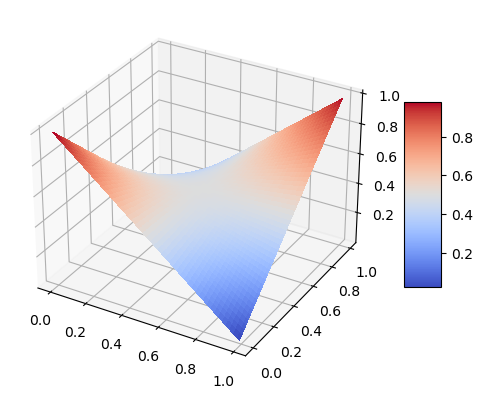

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # genera caja de 3D

Y = np.arange(0, 1, 0.01)
YP = np.arange(0, 1, 0.01)
Y, YP = np.meshgrid(Y, YP) # creacion de una malla con las variables y , yp, dado que se trabaja sobre un plano y no una linea
Z = likelihood(Y, YP) # el eje funcion z representa la verosimilitud (likelihood)

surf = ax.plot_surface(Y, YP, Z, cmap=cm.coolwarm, # creacion de la superficie calculada de las dos variables en espacio 3D
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5) # paleta de colores

plt.show()

Considerando $p \rightarrow \log(p)$, y sumando la verosimilitud para todos los puntos del dataset obtenemos: 

$$
max{\sum_i \left(y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)} \\
= \min - \sum_i \left( y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)
$$

que es la conocida función de costo para clasificación conocida como Cross-entropy. 

## Regresión logística con Scikit-learn

Recordemos que:

$$
\hat{y} = \frac{1}{1-\exp{(-\text{log-odds})}}
$$

donde $\text{log-odds} = \beta_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo.

Aplicaremos un ejercicio de clasificación simple con el dataset Iris: 
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [19]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

atrib_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X, y = load_iris(return_X_y=True) # X feature, y target; return_x_y=true return the format (data,target)

In [21]:
X[:2] # los dos primeros data points del conjunto

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [23]:
y[:100] # limitacion de las clases a 0 y 1 para tener un problema binario hasta el valor 100

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
clf = LogisticRegression(random_state=10, solver='liblinear').fit(X[:100], y[:100]) # construccion del modelo clasificador, 
#solver=liblinear es el metodo de optimizacion del modelo

Revisamos los parámetros resultantes $\beta_i$: 

In [27]:
clf.coef_ # muestra los coeficientes beta asociados a las cuatro variables, que representan los parametros que mejor ajustan las 
# predicciones del modelo  de clasificacion a las categorias dadas por los datos reales

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])

In [29]:
model_coefs = pd.DataFrame(clf.coef_, columns=atrib_names)
model_coefs

,sepal length,sepal width,petal length,petal width
0,-0.402474,-1.463829,2.237856,1.000093
